# Hypothesis

We can predict how many medals a country will win at the Olympics by using historical data.

# The Data

A dataset of how many medals each country won at each Olympics.  Other data would also be nice (number of athletes, etc).

In [ ]:
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Course/main/data/olympic_teams.csv'
teams = pd.read_csv(url)

In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [ ]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [ ]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [ ]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [ ]:
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [ ]:
import seaborn as sns

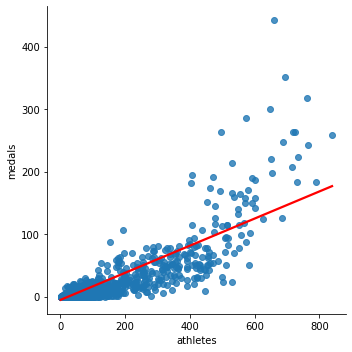

In [ ]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None, line_kws={'color': 'red'}) 

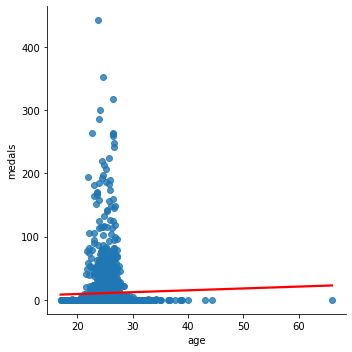

In [ ]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None, line_kws={'color': 'red'})

<AxesSubplot:ylabel='Frequency'>

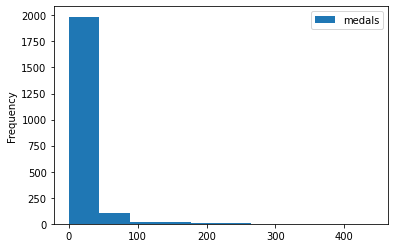

In [ ]:
teams.plot.hist(y="medals")

In [ ]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [ ]:
teams = teams.dropna()

In [ ]:
teams.shape

(2014, 7)

In [ ]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [ ]:
# About 80% of the data
train.shape

(1609, 7)

In [ ]:
# About 20% of the data
test.shape

(405, 7)

# Accuracy Metric

We'll use mean squared error.  This is a good default regression accuracy metric.  It's the average of squared differences between the actual results and your predictions.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
predictors = ["athletes", "prev_medals"]

In [ ]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
predictions.shape

(405,)

In [ ]:
test["predictions"] = predictions

In [ ]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [ ]:
test["predictions"] = test["predictions"].round()

In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [ ]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [ ]:
test["predictions"] = predictions

In [ ]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [ ]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,6.921667
908,IND,India,2016,130,26.1,6.0,2,11.683176


In [ ]:
errors = (test["medals"] - predictions).abs()

In [ ]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

In [ ]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<AxesSubplot:ylabel='Frequency'>

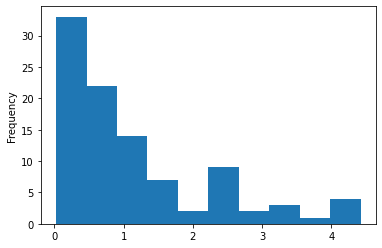

In [ ]:
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64

# Next steps

This model works well for countries which have a high medal count, and compete in a stable number of events annually.  For countries that get fewer medals, you'd want to build this model in a different way.

Some potential next steps:

* Add in some more predictors to the model, like `height`, `athletes`, or `age`.
* Go back to the original, athlete-level data (`athlete_events.csv`), and try to compute some additional variables, like total number of years competing in the Olympics.
* For countries with low medal counts, you can try modelling if individual athletes will win their event.  You can build event-specific models to predict if athletes will win their events.  Then you can add up the predicted medals for each athlete from each country.  This will give you the total predicted medal count for that country.